### Import Libraries

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### Original Image

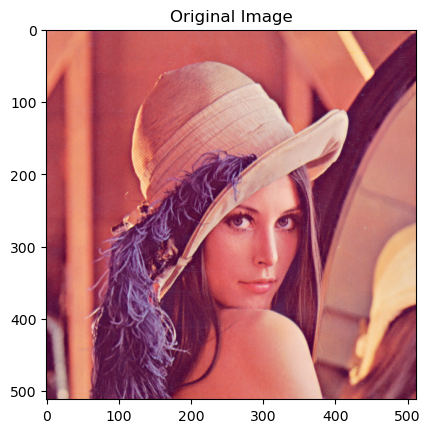

In [66]:
original_image = cv2.imread('Lena.png')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### Gray Scaled Image

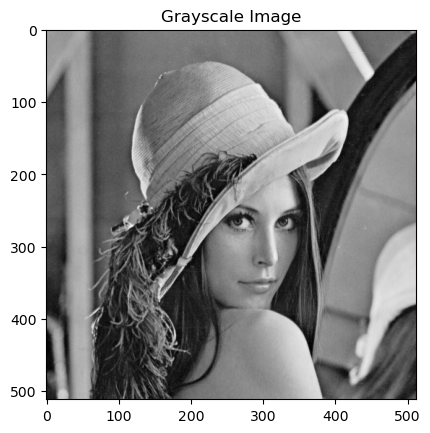

In [67]:
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

### Image Translation

In [68]:
def image_translation(image, dx, dy):
    rows, cols = image.shape
    translated_image = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if 0 <= i + dx < rows and 0 <= j + dy < cols:
                translated_image[i + dx, j + dy] = image[i, j]
    return translated_image

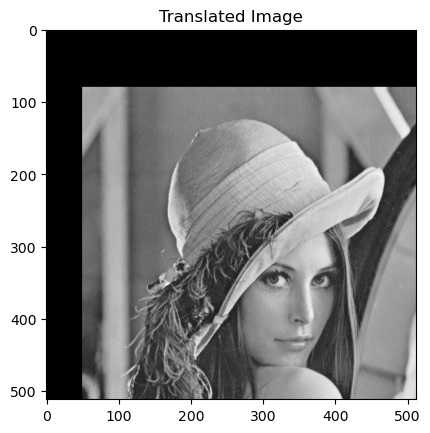

In [69]:
translated_image = image_translation(grayscale_image, 80, 50)
plt.imshow(translated_image, cmap='gray')
plt.title('Translated Image')
plt.show()

### Image Scaling

In [70]:
def image_scaling(image, scale_factor):
    rows, cols = image.shape
    scaled_rows = int(rows * scale_factor[0])
    scaled_cols = int(cols * scale_factor[1])
    scaled_image = np.zeros((scaled_rows, scaled_cols), dtype=np.uint8)
    for i in range(scaled_rows):
        for j in range(scaled_cols):
            original_i = int(i / scale_factor[0])
            original_j = int(j / scale_factor[1])
            if 0 <= original_i < rows and 0 <= original_j < cols:
                scaled_image[i, j] = image[original_i, original_j]
    return scaled_image

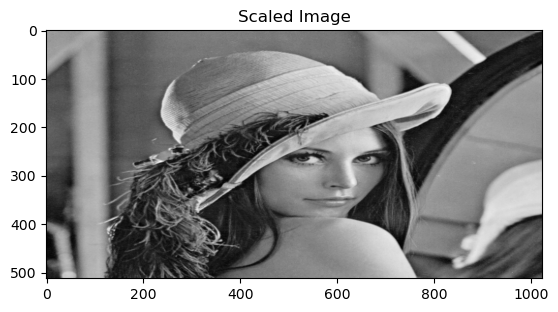

In [71]:
scaled_image = image_scaling(grayscale_image, (1, 2))
plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image')
plt.show()

### Image Rotation

In [72]:
def image_rotation(image, angle):
    rows, cols = image.shape
    cos_theta = math.cos(math.radians(angle))
    sin_theta = math.sin(math.radians(angle))
    new_rows = int(abs(rows * cos_theta) + abs(cols * sin_theta))
    new_cols = int(abs(cols * cos_theta) + abs(rows * sin_theta))
    rotated_image = np.zeros((new_rows, new_cols), dtype=np.uint8)
    center_x = rows / 2
    center_y = cols / 2
    middle_x = new_rows / 2
    middle_y = new_cols / 2
    for i in range(new_rows):
        for j in range(new_cols):
            original_i = int((i - middle_x) * cos_theta + (j - middle_y) * sin_theta + center_x)
            original_j = int(-(i - middle_x) * sin_theta + (j - middle_y) * cos_theta + center_y)
            if 0 <= original_i < rows and 0 <= original_j < cols:
                rotated_image[i, j] = image[original_i, original_j]
    return rotated_image

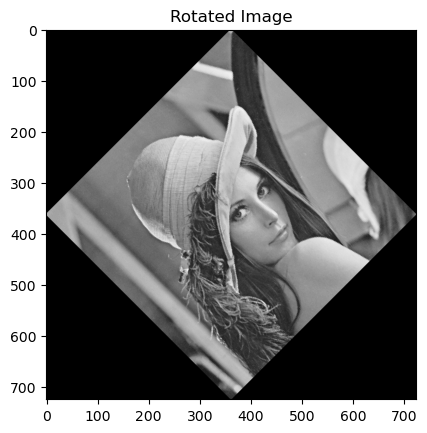

In [73]:
rotated_image = image_rotation(grayscale_image, 45)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')
plt.show()

### Image Shearing

In [74]:
def image_shear(image, shear_factor, axis):
    rows, cols = image.shape
    if axis == 'x':
        shear_matrix = np.array([[1, shear_factor], [0, 1]])
    else:
        shear_matrix = np.array([[1, 0], [shear_factor, 1]])

    new_rows,new_cols = np.dot(shear_matrix, [rows, cols])
    sheared_image = np.zeros((int(new_rows), int(new_cols)), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_i, new_j = np.dot(shear_matrix, [i, j])
            if 0 <= new_i < new_rows and 0 <= new_j < new_cols:
                sheared_image[int(new_i), int(new_j)] = image[i, j]
    return sheared_image    

### Shearing in X-Direction

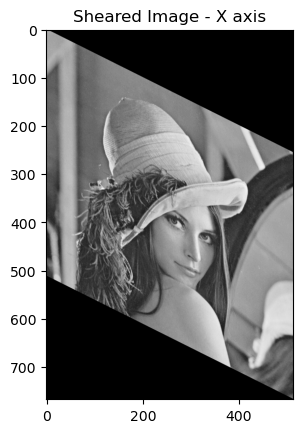

In [75]:
sheared_image_x = image_shear(grayscale_image, 0.5, 'x')
plt.imshow(sheared_image_x, cmap='gray')
plt.title('Sheared Image - X axis')
plt.show()

### Shearing in Y-Direction

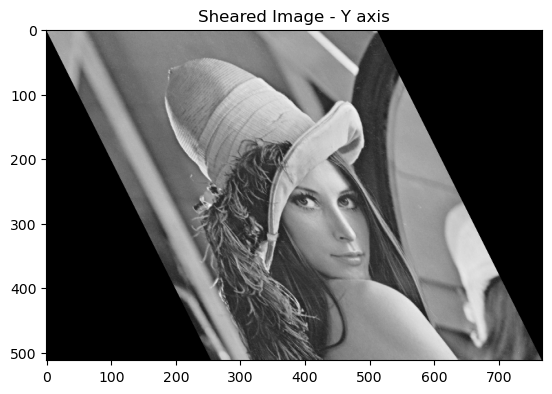

In [76]:
sheared_image_y = image_shear(grayscale_image, 0.5, 'y')
plt.imshow(sheared_image_y, cmap='gray')
plt.title('Sheared Image - Y axis')
plt.show()